In [43]:
import numpy as np
import pandas as pd
import geopandas as gpd
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import libpysal as ps
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
from splot import esda as esdaplot
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, cross_val_predict

In [17]:
# Load the data
gdf = gpd.read_file("/work/Final data/gdf_model.shp")

In [18]:
gdf.head()

Code  Experience  OneOrMoreP  Underweigh  NormalWeig  Overweight  \
0  GM1680        83.1        13.8         0.7        50.1        49.2   
1  GM0358        82.7        10.2         1.2        50.3        48.5   
2  GM0197        79.1        15.1         1.4        49.2        49.4   
3  GM0059        79.1        16.0         0.8        42.6        56.6   
4  GM0482        77.0        17.1         2.0        41.7        56.3   

   Smokers  ExcessiveD  DistanceTo  Distance_1  ...  Distance_7  Distance_8  \
0     14.3         5.4         2.4         2.1  ...        12.5        28.6   
1     13.0         5.0         0.9         0.8  ...         8.1         8.9   
2     14.7         6.6         1.5         1.4  ...         4.4        41.0   
3     19.8         7.9         1.6         1.5  ...         7.3        26.8   
4     14.9         5.2         0.8         0.6  ...         8.5        11.2   

      Gemeentena  Provinciec     Provincien  Population  DensityPer  \
0    Aa en Hunze        PV22        Drenthe     25445.0        92.0   
1       Aalsmeer        PV27  Noord-Holland     31859.0      1584.0   
2         Aalten        PV25     Gelderland     27121.0       281.0   
3  Achtkarspelen        PV21      Friesland     27843.0       272.0   
4   Alblasserdam        PV28   Zuid-Holland     20165.0      2297.0   

   CarsPer100  Greenindic                                           geometry  
0       576.0        41.0  POLYGON ((248579.512 567922.543, 248630.962 56...  
1       532.0        50.0  POLYGON ((116307.661 478635.954, 116369.516 47...  
2       527.0        39.0  POLYGON ((236230.546 443306.852, 236251.256 44...  
3       529.0        46.0  POLYGON ((208871.810 587327.160, 208892.310 58...  
4       454.0        68.0  POLYGON ((102779.950 432792.060, 102785.681 43...  

[5 rows x 27 columns]

In [19]:
gdf.columns

Index(['Code', 'Experience', 'OneOrMoreP', 'Underweigh', 'NormalWeig',
       'Overweight', 'Smokers', 'ExcessiveD', 'DistanceTo', 'Distance_1',
       'Distance_2', 'DSWithin20', 'Distance_3', 'CafeWithin', 'Distance_4',
       'Distance_5', 'Distance_6', 'Distance_7', 'Distance_8', 'Gemeentena',
       'Provinciec', 'Provincien', 'Population', 'DensityPer', 'CarsPer100',
       'Greenindic', 'geometry'],
      dtype='object')

In [6]:
gdf

Code  Experience  OneOrMoreP  Underweigh  NormalWeig  Overweight  \
0    GM1680        83.1        13.8         0.7        50.1        49.2   
1    GM0358        82.7        10.2         1.2        50.3        48.5   
2    GM0197        79.1        15.1         1.4        49.2        49.4   
3    GM0059        79.1        16.0         0.8        42.6        56.6   
4    GM0482        77.0        17.1         2.0        41.7        56.3   
..      ...         ...         ...         ...         ...         ...   
348  GM0879        78.6        13.9         0.8        44.4        54.8   
349  GM0301        79.6        14.0         1.7        50.6        47.7   
350  GM1896        83.0        12.2         1.9        42.5        55.6   
351  GM0642        75.2        15.0         2.1        41.2        56.7   
352  GM0193        82.6        12.8         2.1        52.1        45.8   

     Smokers  ExcessiveD  DistanceTo  Distance_1  ...  Distance_7  Distance_8  \
0       14.3         5.4         2.4         2.1  ...        12.5        28.6   
1       13.0         5.0         0.9         0.8  ...         8.1         8.9   
2       14.7         6.6         1.5         1.4  ...         4.4        41.0   
3       19.8         7.9         1.6         1.5  ...         7.3        26.8   
4       14.9         5.2         0.8         0.6  ...         8.5        11.2   
..       ...         ...         ...         ...  ...         ...         ...   
348     12.2         8.5         2.2         1.3  ...        12.9        15.5   
349     16.8         5.0         0.8         0.7  ...         2.6         2.6   
350     18.2         7.6         1.0         1.1  ...        11.4        15.3   
351     14.9         5.6         0.7         0.6  ...         2.0         5.4   
352     17.6         5.7         0.9         0.8  ...         2.7         3.5   

          Gemeentena  Provinciec     Provincien  Population  DensityPer  \
0        Aa en Hunze        PV22        Drenthe     25445.0        92.0   
1           Aalsmeer        PV27  Noord-Holland     31859.0      1584.0   
2             Aalten        PV25     Gelderland     27121.0       281.0   
3      Achtkarspelen        PV21      Friesland     27843.0       272.0   
4       Alblasserdam        PV28   Zuid-Holland     20165.0      2297.0   
..               ...         ...            ...         ...         ...   
348          Zundert        PV30  Noord-Brabant     21829.0       181.0   
349          Zutphen        PV25     Gelderland     47934.0      1170.0   
350  Zwartewaterland        PV23     Overijssel     22685.0       275.0   
351      Zwijndrecht        PV28   Zuid-Holland     44737.0      2204.0   
352           Zwolle        PV23     Overijssel    128840.0      1160.0   

     CarsPer100  Greenindic                                           geometry  
0         576.0        41.0  POLYGON ((248579.512 567922.543, 248630.962 56...  
1         532.0        50.0  POLYGON ((116307.661 478635.954, 116369.516 47...  
2         527.0        39.0  POLYGON ((236230.546 443306.852, 236251.256 44...  
3         529.0        46.0  POLYGON ((208871.810 587327.160, 208892.310 58...  
4         454.0        68.0  POLYGON ((102779.950 432792.060, 102785.681 43...  
..          ...         ...                                                ...  
348       569.0        34.0  POLYGON ((108753.234 394902.697, 108820.795 39...  
349       446.0        58.0  POLYGON ((210514.008 464180.421, 210524.205 46...  
350       493.0        68.0  MULTIPOLYGON (((197752.503 517522.481, 197831....  
351       480.0        53.0  POLYGON ((100667.470 428125.890, 100687.210 42...  
352       430.0        74.0  POLYGON ((209725.850 511034.702, 209754.203 51...  

[353 rows x 27 columns]

In [20]:
#Create the dependent variable and independent variables
#Using amount of snackbars and supermarkets within 5km en the distance to the nearest trainstation

y = gdf['Overweight'].values.reshape(-1, 1)
X = gdf[['Experience', 'OneOrMoreP', 'Smokers', 'DistanceTo', 'Distance_1', 'Distance_2', 
        'DSWithin20', 'Distance_3', 'CafeWithin', 'Distance_4', 'Distance_5', 'Distance_6', 'Distance_7',
        'Distance_8', 'CarsPer100', 'Greenindic']].values

In [21]:
X

array([[ 83.1,  13.8,  14.3, ...,  28.6, 576. ,  41. ],
       [ 82.7,  10.2,  13. , ...,   8.9, 532. ,  50. ],
       [ 79.1,  15.1,  14.7, ...,  41. , 527. ,  39. ],
       ...,
       [ 83. ,  12.2,  18.2, ...,  15.3, 493. ,  68. ],
       [ 75.2,  15. ,  14.9, ...,   5.4, 480. ,  53. ],
       [ 82.6,  12.8,  17.6, ...,   3.5, 430. ,  74. ]])

In [22]:
#Prepare the coordinates for GWR using the geometry column of the GeoDataFrame:
coordinates = np.array([(geom.centroid.x, geom.centroid.y) for geom in gdf.geometry])

-----Model optimization----

In [23]:
#Select the bandwith
sel_bw = Sel_BW(coordinates, y, X)
bw = sel_bw.search()

In [24]:
#Fit GWR model
gwr_model = GWR(coordinates, y, X, bw)
gwr_results = gwr_model.fit()

In [28]:
#Optimization for GWR attributes with Exhaustive Feature Selection!
#Note to self, we should also look at gaussian vs. bisquare vs exponential. And alfa values. And fixed vs adaptive 

# Define the attributes you want to consider for your model

# Smaller subset
predictor_columns = ['Experience', 'OneOrMoreP', 'Smokers', 'DSWithin20', 'CafeWithin', 'Distance_4', 'Distance_5', 'Distance_6', 'Distance_7','Distance_8', 'CarsPer100', 'Greenindic']

# Generate all possible combinations of predictor attributes
combinations = []
for L in range(1, len(predictor_columns) + 1):
    for subset in itertools.combinations(predictor_columns, L):
        combinations.append(list(subset))

# Initialize variables to track the best model
best_model = None
best_R2 = -np.inf
best_AIC = np.inf
best_predictors = None

# Loop through all possible combinations of predictor attributes
for predictors in combinations:
    # Create the dependent variable and independent variables
    X = gdf[predictors].values
    
    # Select the bandwidth
    sel_bw = Sel_BW(coordinates, y, X)
    bw = sel_bw.search()
    
    # Fit GWR model
    gwr_model = GWR(coordinates, y, X, bw)
    gwr_results = gwr_model.fit()

    # Check if the model performance is better than the best model so far
    if gwr_results.R2 > best_R2 and gwr_results.aic < best_AIC:
        best_model = gwr_results
        best_R2 = gwr_results.R2
        best_AIC = gwr_results.aic
        best_predictors = predictors

# Print the results of the best model
print(f"Best predictor combination: {best_predictors}")
print(f"Best R-squared value: {best_R2}")
print(f"Best AIC value: {best_AIC}")

Best predictor combination: ['Experience', 'OneOrMoreP', 'Smokers', 'DSWithin20', 'CafeWithin', 'Distance_5', 'Distance_8', 'CarsPer100']
Best R-squared value: 0.7575430776945873
Best AIC value: 1734.9896785270612


In [ ]:
# Define the possible hyperparameters
kernels = ['gaussian', 'bisquare', 'exponential']
fixed_adaptive_options = ['fixed', 'adaptive']

# Use the best predictor combination found earlier
best_predictors = ['Experience', 'OneOrMoreP', 'Smokers', 'DSWithin20', 'CafeWithin', 'Distance_5', 'Distance_8', 'CarsPer100']
X = gdf[best_predictors].values

# Initialize variables to track the best model
best_model = None
best_R2 = -np.inf
best_AIC = np.inf
best_hyperparams = None

# Loop through all possible combinations of hyperparameters
for kernel, fixed_adaptive in itertools.product(kernels, fixed_adaptive_options):
    # Select the bandwidth
    sel_bw = Sel_BW(coordinates, y, X, fixed= fixed_adaptive=='fixed', kernel=kernel)
    bw = sel_bw.search()
    
    # Fit GWR model
    gwr_model = GWR(coordinates, y, X, bw, fixed= fixed_adaptive=='fixed', kernel=kernel)
    gwr_results = gwr_model.fit()

    # Check if the model performance is better than the best model so far
    if gwr_results.R2 > best_R2 and gwr_results.aic < best_AIC:
        best_model = gwr_results
        best_R2 = gwr_results.R2
        best_AIC = gwr_results.aic
        best_hyperparams = (kernel, fixed_adaptive)

# Print the results of the best model
print(f"Best hyperparameters: {best_hyperparams}")
print(f"Best R-squared value: {best_R2}")

In [ ]:
# Fit the model with the best hyperparameters
best_kernel, best_fixed_adaptive = best_hyperparams
sel_bw = Sel_BW(coordinates, y, X, fixed=best_fixed_adaptive == 'fixed', kernel=best_kernel)
bw = sel_bw.search()
gwr_model = GWR(coordinates, y, X, bw, fixed=best_fixed_adaptive == 'fixed', kernel=best_kernel)
gwr_results = gwr_model.fit()

#Explore results
print(gwr_results.R2)  # R-squared value
print(gwr_results.aic)  # Akaike Information Criterion
#print(gwr_results.localR2)  # Local R-squared values
#print(gwr_results.params)  # Local parameter estimates

# Calculate residuals
gwr_residuals = gwr_results.resid_response

# Checking for spatial autocorrelation
# Create a spatial weights matrix
# Here, I'm using KNN with k=8 neighbors
spatial_weights = weights.KNN.from_dataframe(gdf, k=8)
spatial_weights.transform = 'r'

# Calculate Moran's I for the residuals
moran = esda.Moran(gwr_residuals, spatial_weights)

# Print Moran's I value and its statistical significance
print(f"Moran's I: {moran.I:.4f}")
print(f"Moran's I p-value: {moran.p_sim:.4f}")

In your case, the Moran's I value is 0.0089, which is close to zero. This indicates that there is little to no spatial autocorrelation in the residuals. A positive Moran's I value would suggest a clustered pattern, while a negative value would indicate a dispersed pattern. In general, a value close to zero is desirable, as it suggests that the model has accounted for spatial patterns in the data.

The p-value associated with Moran's I (0.3280) measures the statistical significance of the spatial autocorrelation. A high p-value (typically greater than 0.05) means that the observed spatial autocorrelation is not statistically significant, and you cannot reject the null hypothesis of no spatial autocorrelation in the residuals. In this case, the p-value of 0.3280 suggests that the spatial autocorrelation in the residuals is not statistically significant.

In summary, your GWR model seems to have accounted for the spatial patterns in the data, and there is no significant spatial autocorrelation in the residuals. This indicates that the model has captured the spatial structure in the data well, and the results can be considered reliable.

-- GWR and MGWR --

In [89]:
# Use the best predictor combination found earlier
best_predictors = ['Experience', 'OneOrMoreP', 'Smokers', 'DSWithin20', 'CafeWithin', 'Distance_5', 'Distance_8', 'CarsPer100']
X = gdf[best_predictors].values

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Select the bandwidth for GWR
gwr_selector = Sel_BW(coordinates, y, X_scaled)
gwr_bw = gwr_selector.search(interval=50, tol=1e-06, max_iter=500)

# Fit the GWR model using standardized values
gwr_model = GWR(coordinates, y, X_scaled, gwr_bw)
gwr_results = gwr_model.fit()

# Select the bandwidth for MGWR
mgwr_selector = Sel_BW(coordinates, y, X_scaled, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[1], interval=50, tol=1e-06, max_iter=500)

# Fit the MGWR model using standardized values
mgwr_model = MGWR(coordinates, y, X_scaled, selector=mgwr_selector)
mgwr_results = mgwr_model.fit()

# Print model results
print("GWR R2:", gwr_results.R2)
print("GWR AIC:", gwr_results.aic)
print("GWR bandwidth:", gwr_bw)

print("MGWR R2:", mgwr_results.R2)
print("MGWR AIC:", mgwr_results.aic)
print("MGWR bandwidth:", mgwr_bw)

Inference: 100%|██████████| 1/1 [00:02<00:00,  2.16s/it]

GWR R2: 0.7575430776945966
GWR AIC: 1734.9896785270503
GWR bandwidth: 111.0
MGWR R2: 0.7825523696554177
MGWR AIC: 1696.0497974328025
MGWR bandwidth: [ 33. 103. 329. 116. 352. 170. 352. 272.  49.]


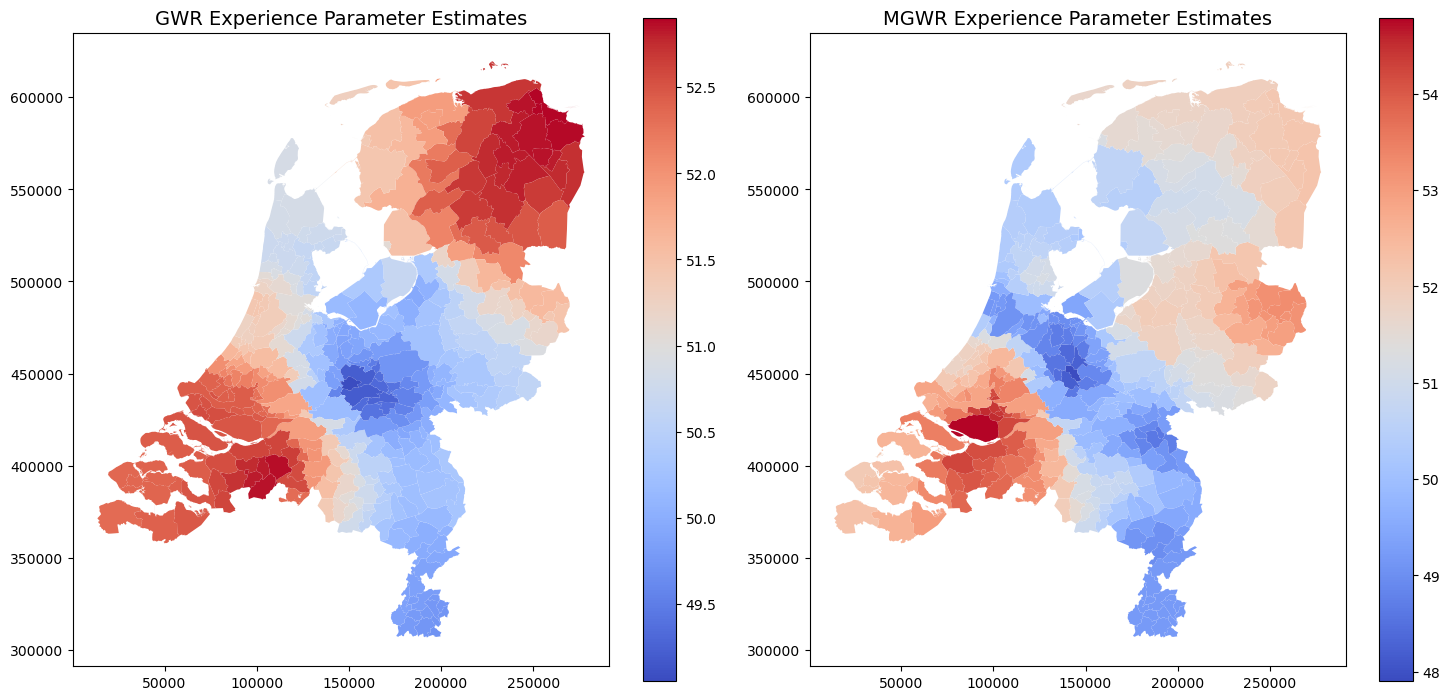

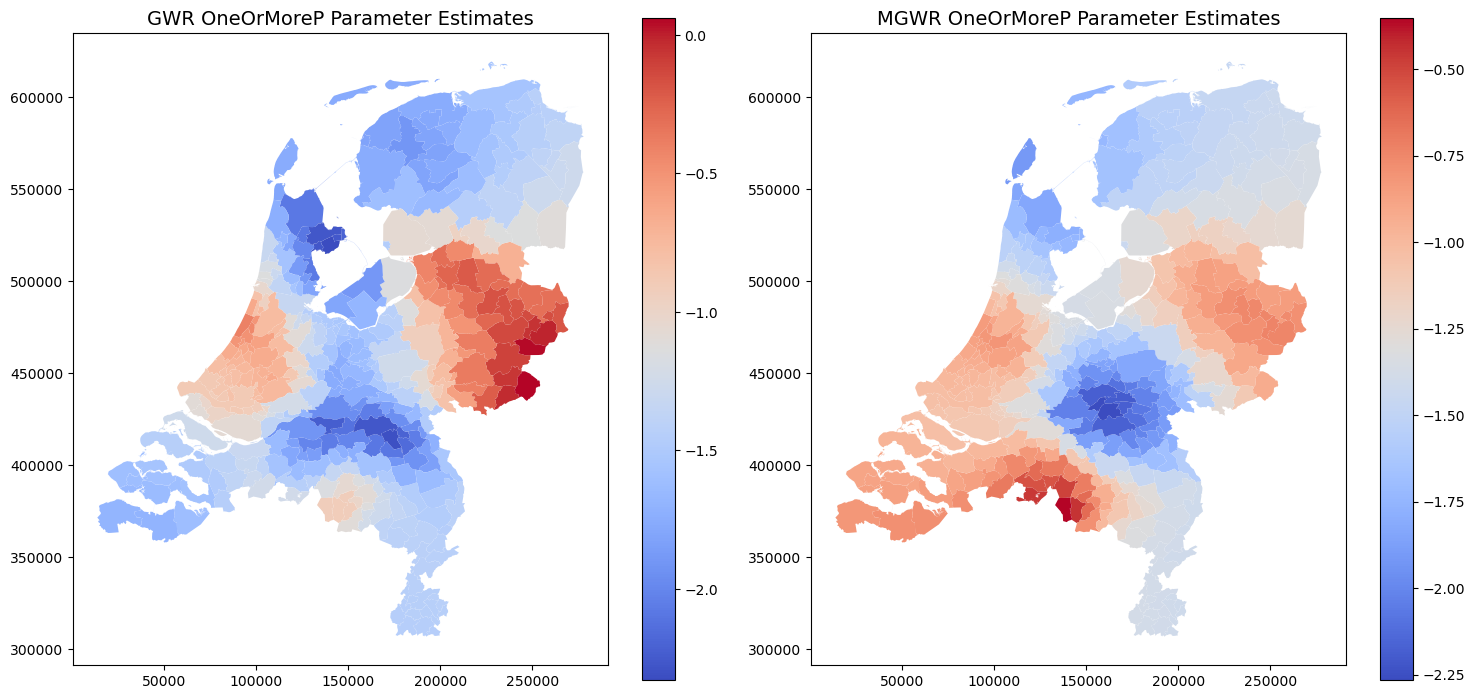

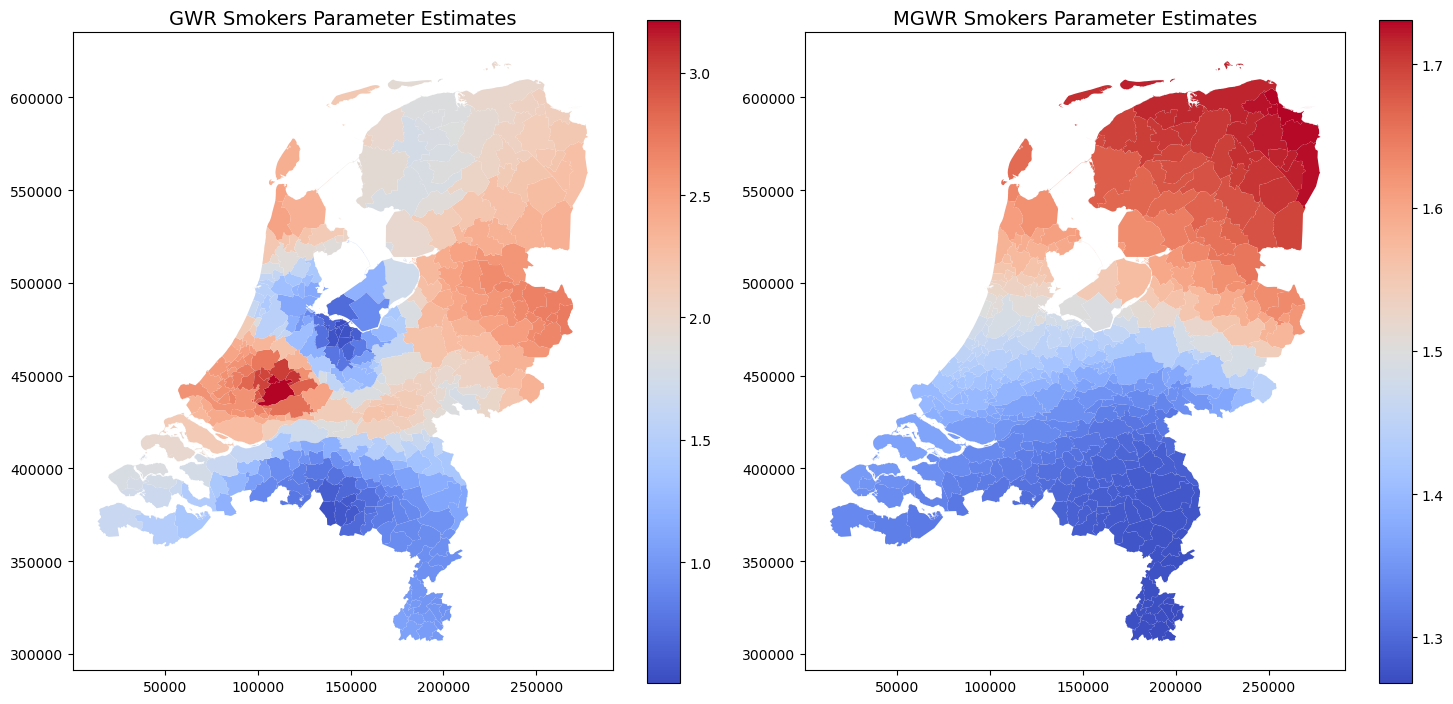

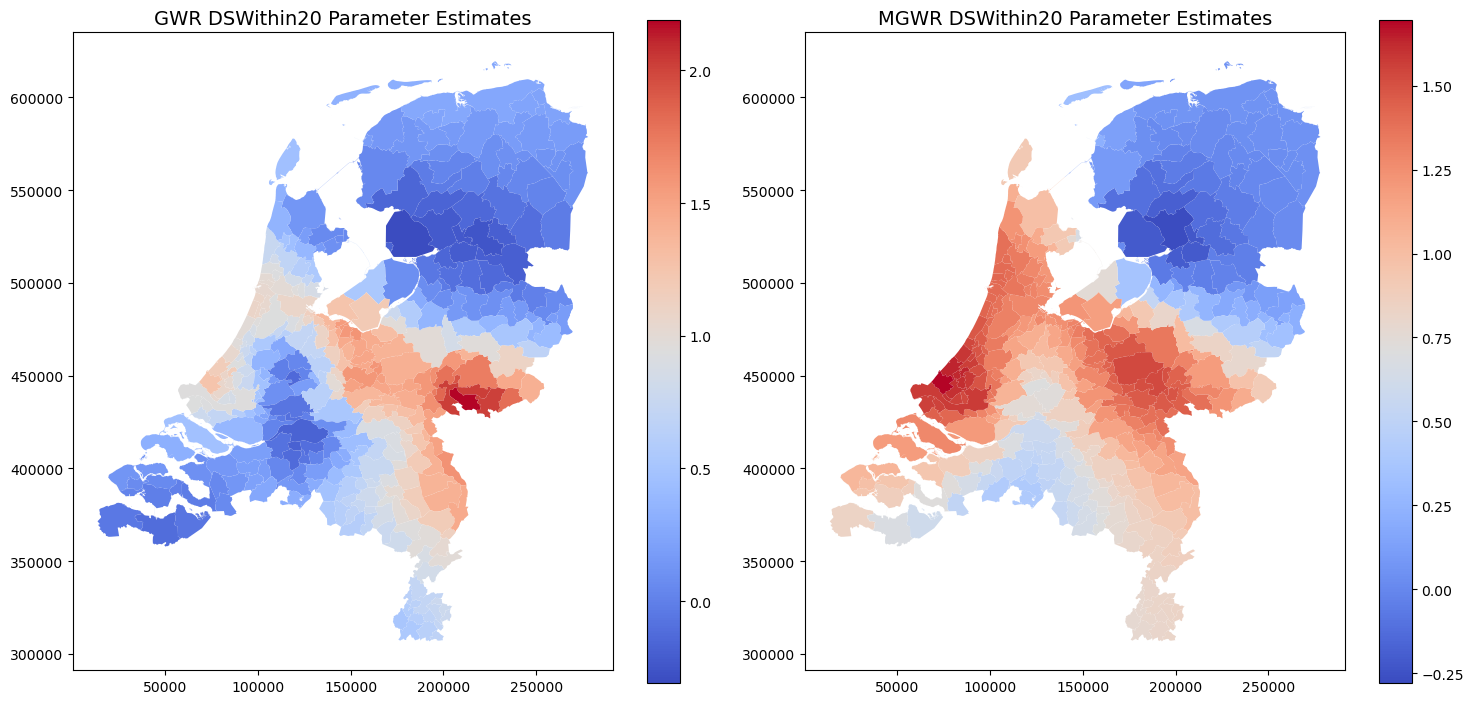

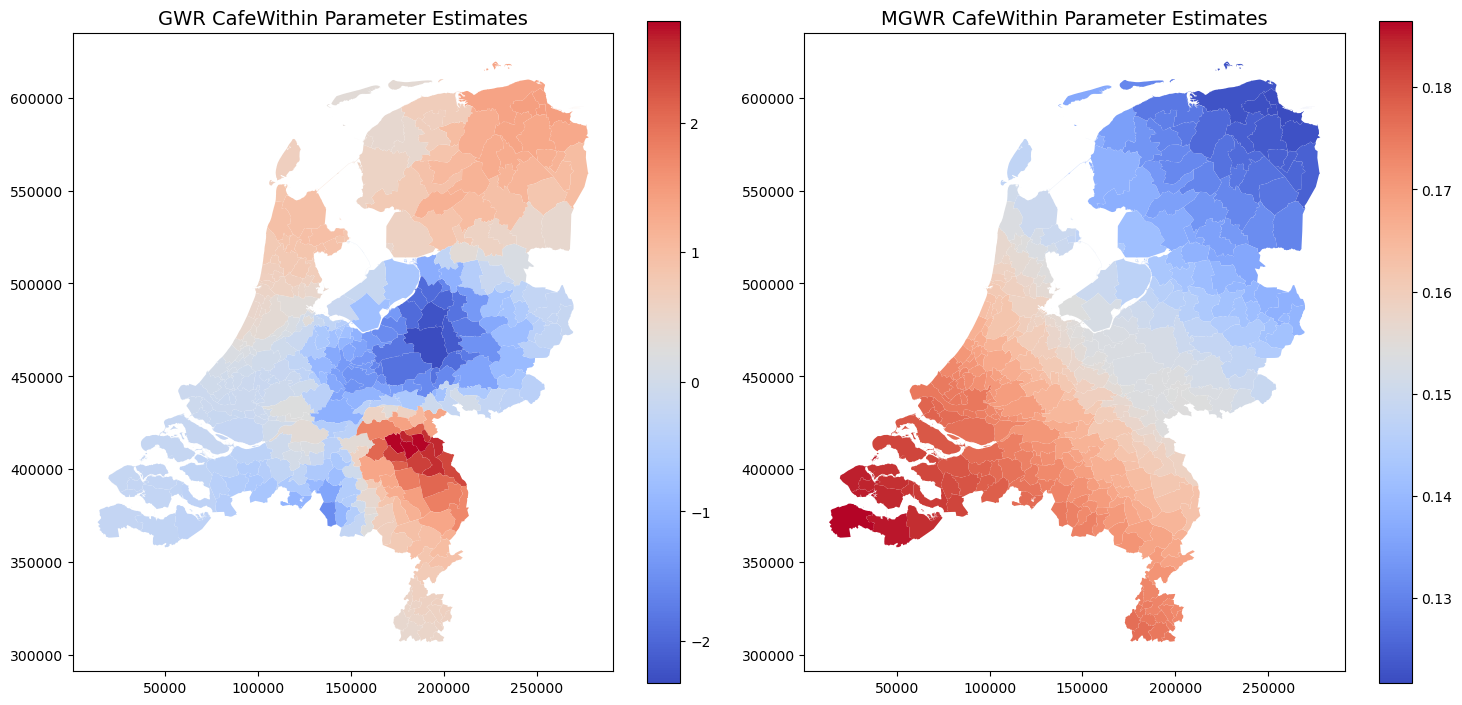

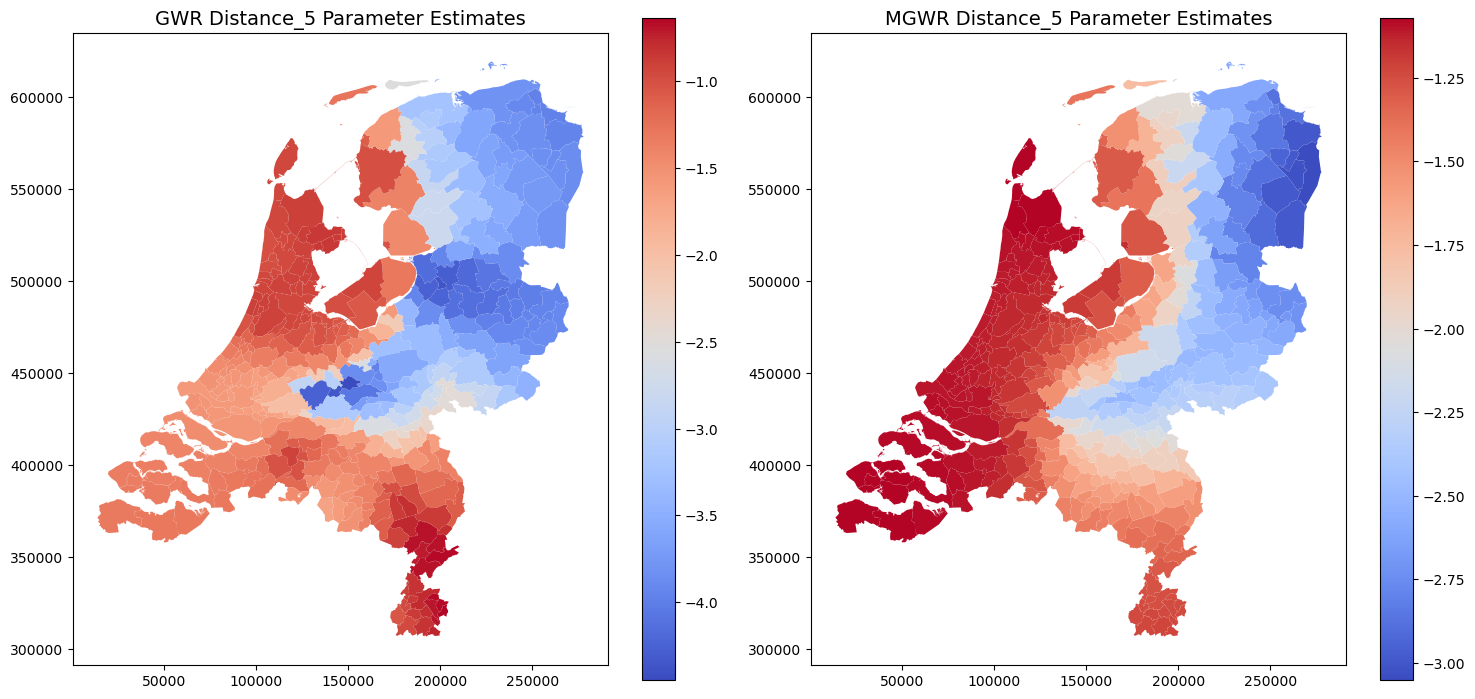

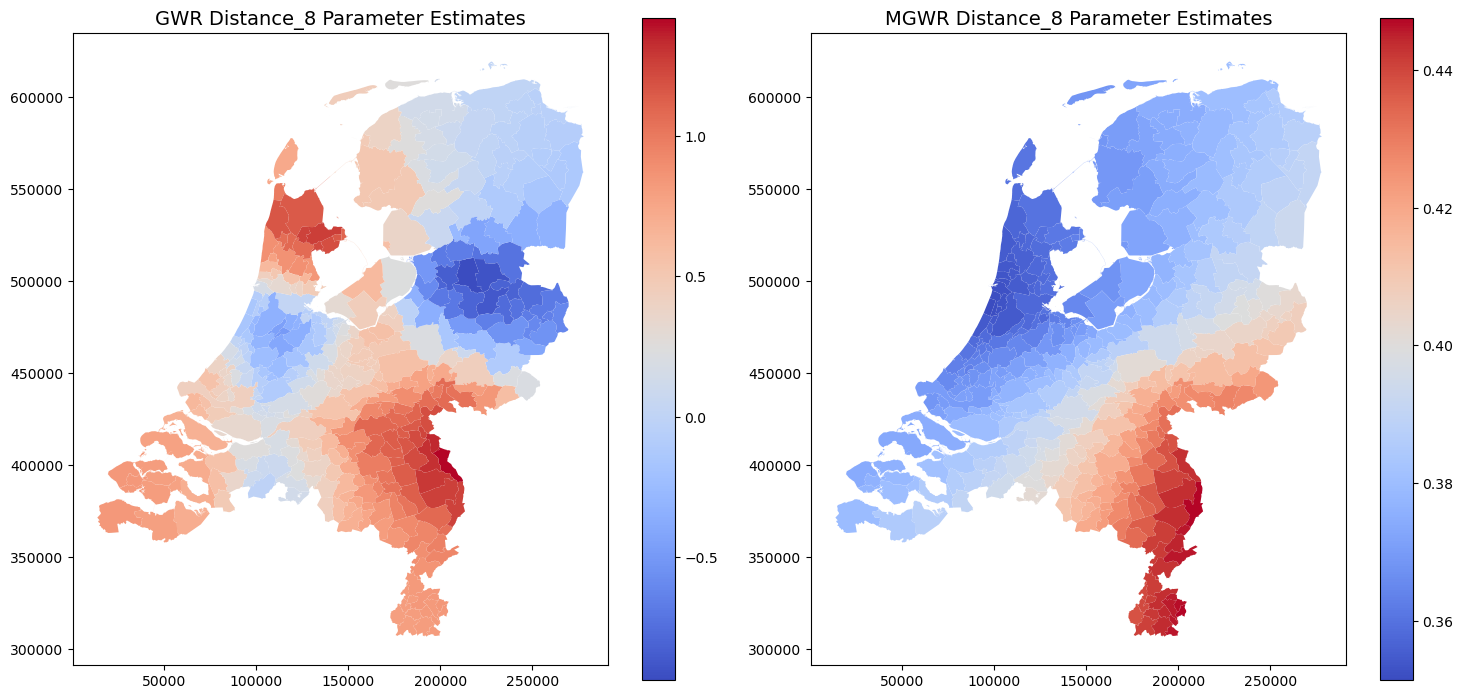

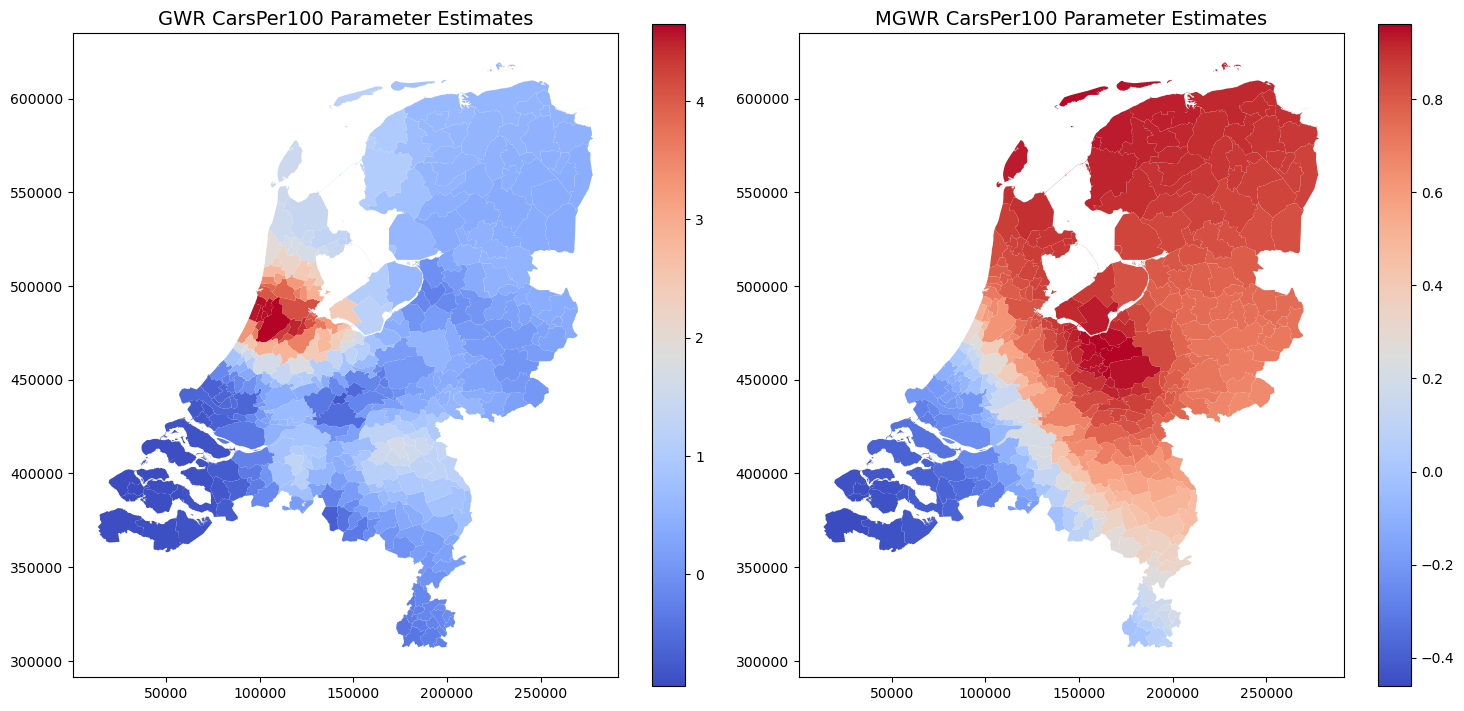

In [92]:
def plot_local_parameters(predictors, gwr_params, mgwr_params, gdf):
    n_predictors = len(predictors)

    for i, predictor in enumerate(predictors):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
        gdf[f'gwr_{predictor}'] = gwr_params[:, i]
        gdf[f'mgwr_{predictor}'] = mgwr_params[:, i]

        gdf.plot(column=f'gwr_{predictor}', cmap='coolwarm', legend=True, ax=ax1)
        ax1.set_title(f'GWR {predictor} Parameter Estimates', fontsize=14)

        gdf.plot(column=f'mgwr_{predictor}', cmap='coolwarm', legend=True, ax=ax2)
        ax2.set_title(f'MGWR {predictor} Parameter Estimates', fontsize=14)

        plt.tight_layout()
        plt.show()

# Call the function to plot the local parameter estimates
plot_local_parameters(best_predictors, gwr_params, mgwr_params, gdf)

In [93]:
def compare_attribute_importance(predictors, gwr_params, mgwr_params):
    gwr_importance = np.abs(gwr_params).mean(axis=0)
    mgwr_importance = np.abs(mgwr_params).mean(axis=0)

    importance_df = pd.DataFrame({
        'Predictor': predictors,
        'GWR Importance': gwr_importance,
        'MGWR Importance': mgwr_importance
    })

    importance_df.sort_values(by='MGWR Importance', ascending=False, inplace=True)
    print(importance_df)

# Add "Intercept" label to the list of predictors
predictors_with_intercept = ["Intercept"] + best_predictors

# Call the function to compare attribute importance
compare_attribute_importance(predictors_with_intercept, gwr_params, mgwr_params)


    Predictor  GWR Importance  MGWR Importance
0   Intercept       51.082126        51.096542
5  CafeWithin        2.000460         1.647097
2  OneOrMoreP        1.759990         1.441197
1  Experience        1.273853         1.289630
8  CarsPer100        0.796262         1.233176
3     Smokers        0.673819         0.890207
7  Distance_8        0.941063         0.580182
6  Distance_5        0.534331         0.391321
4  DSWithin20        0.751883         0.158793


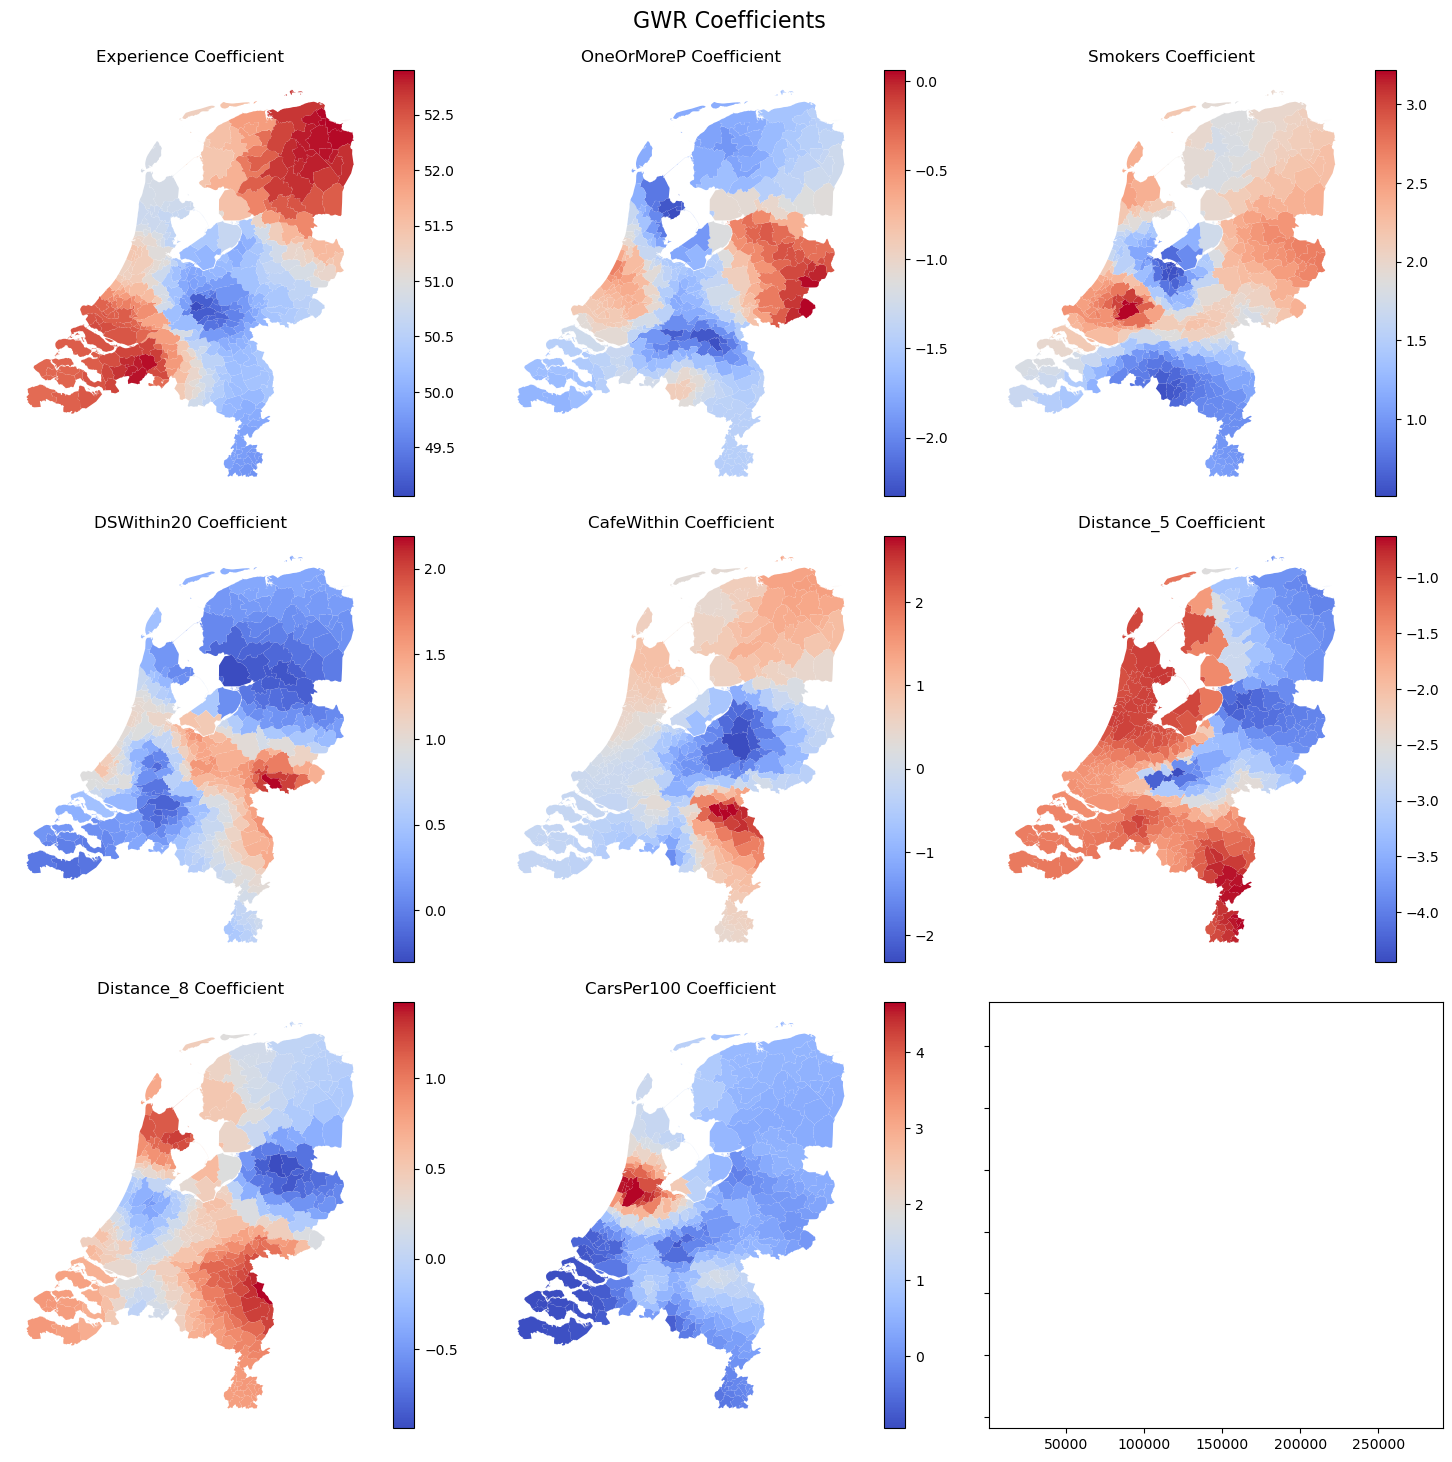

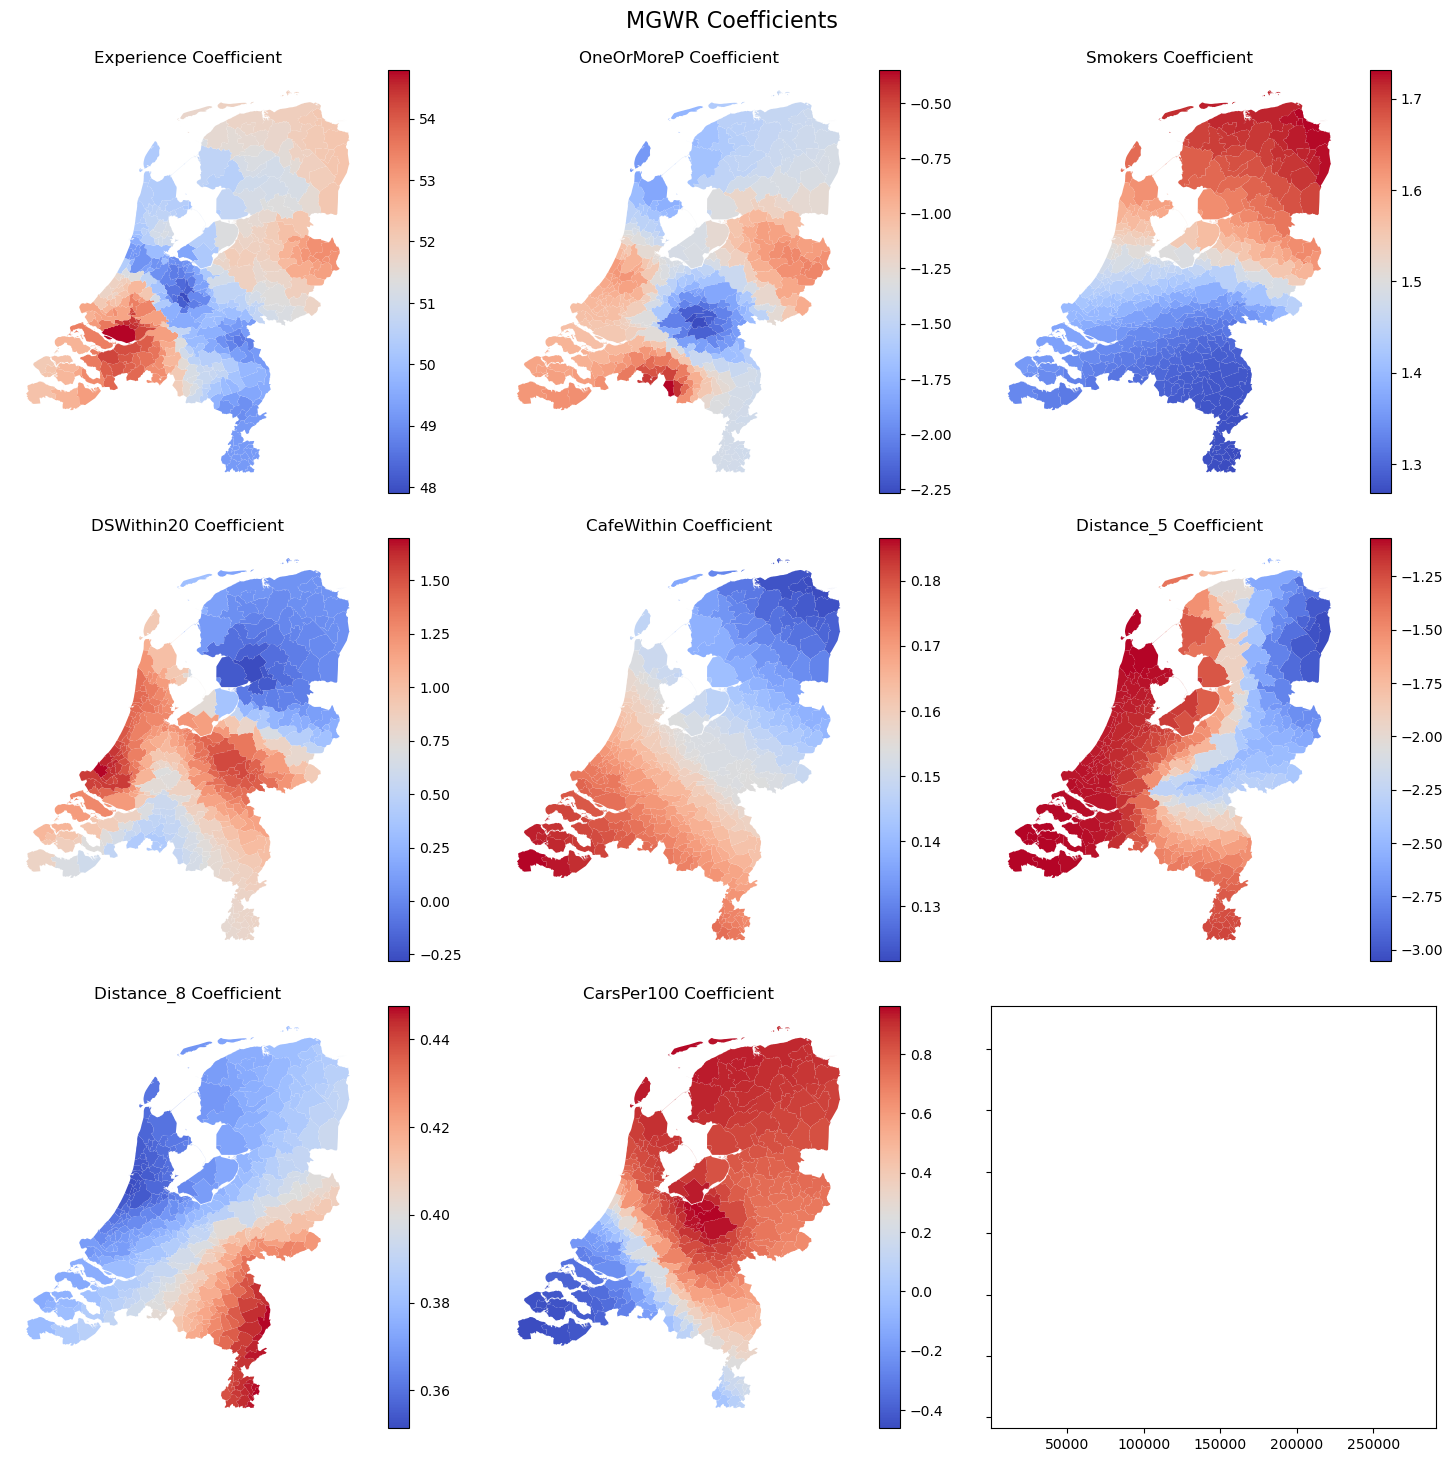

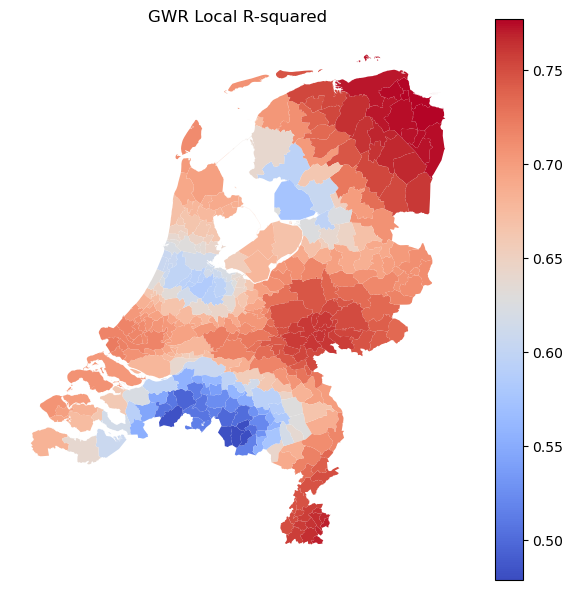

In [96]:
def plot_coefficients(gdf, params, title):
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15), sharex=True, sharey=True)
    axs = axs.ravel()

    for i, predictor in enumerate(best_predictors):
        gdf[f'{predictor}_coef'] = params[:, i]
        gdf.plot(column=f'{predictor}_coef', legend=True, ax=axs[i], cmap='coolwarm')
        axs[i].set_title(f"{predictor} Coefficient")
        axs[i].set_axis_off()

    fig.suptitle(title, fontsize=16)
    fig.tight_layout(pad=2.0)
    plt.show()

# Create coefficient maps for GWR and MGWR
plot_coefficients(gdf, gwr_results.params, "GWR Coefficients")

plot_coefficients(gdf, mgwr_results.params, "MGWR Coefficients")

# Create GWR local R-squared map
fig, ax = plt.subplots(figsize=(6, 6))
gdf['gwr_localR2'] = gwr_results.localR2
gdf.plot(column='gwr_localR2', cmap='coolwarm', legend=True, ax=ax)
ax.set_title('GWR Local R-squared')
ax.set_axis_off()

plt.tight_layout()
plt.show()


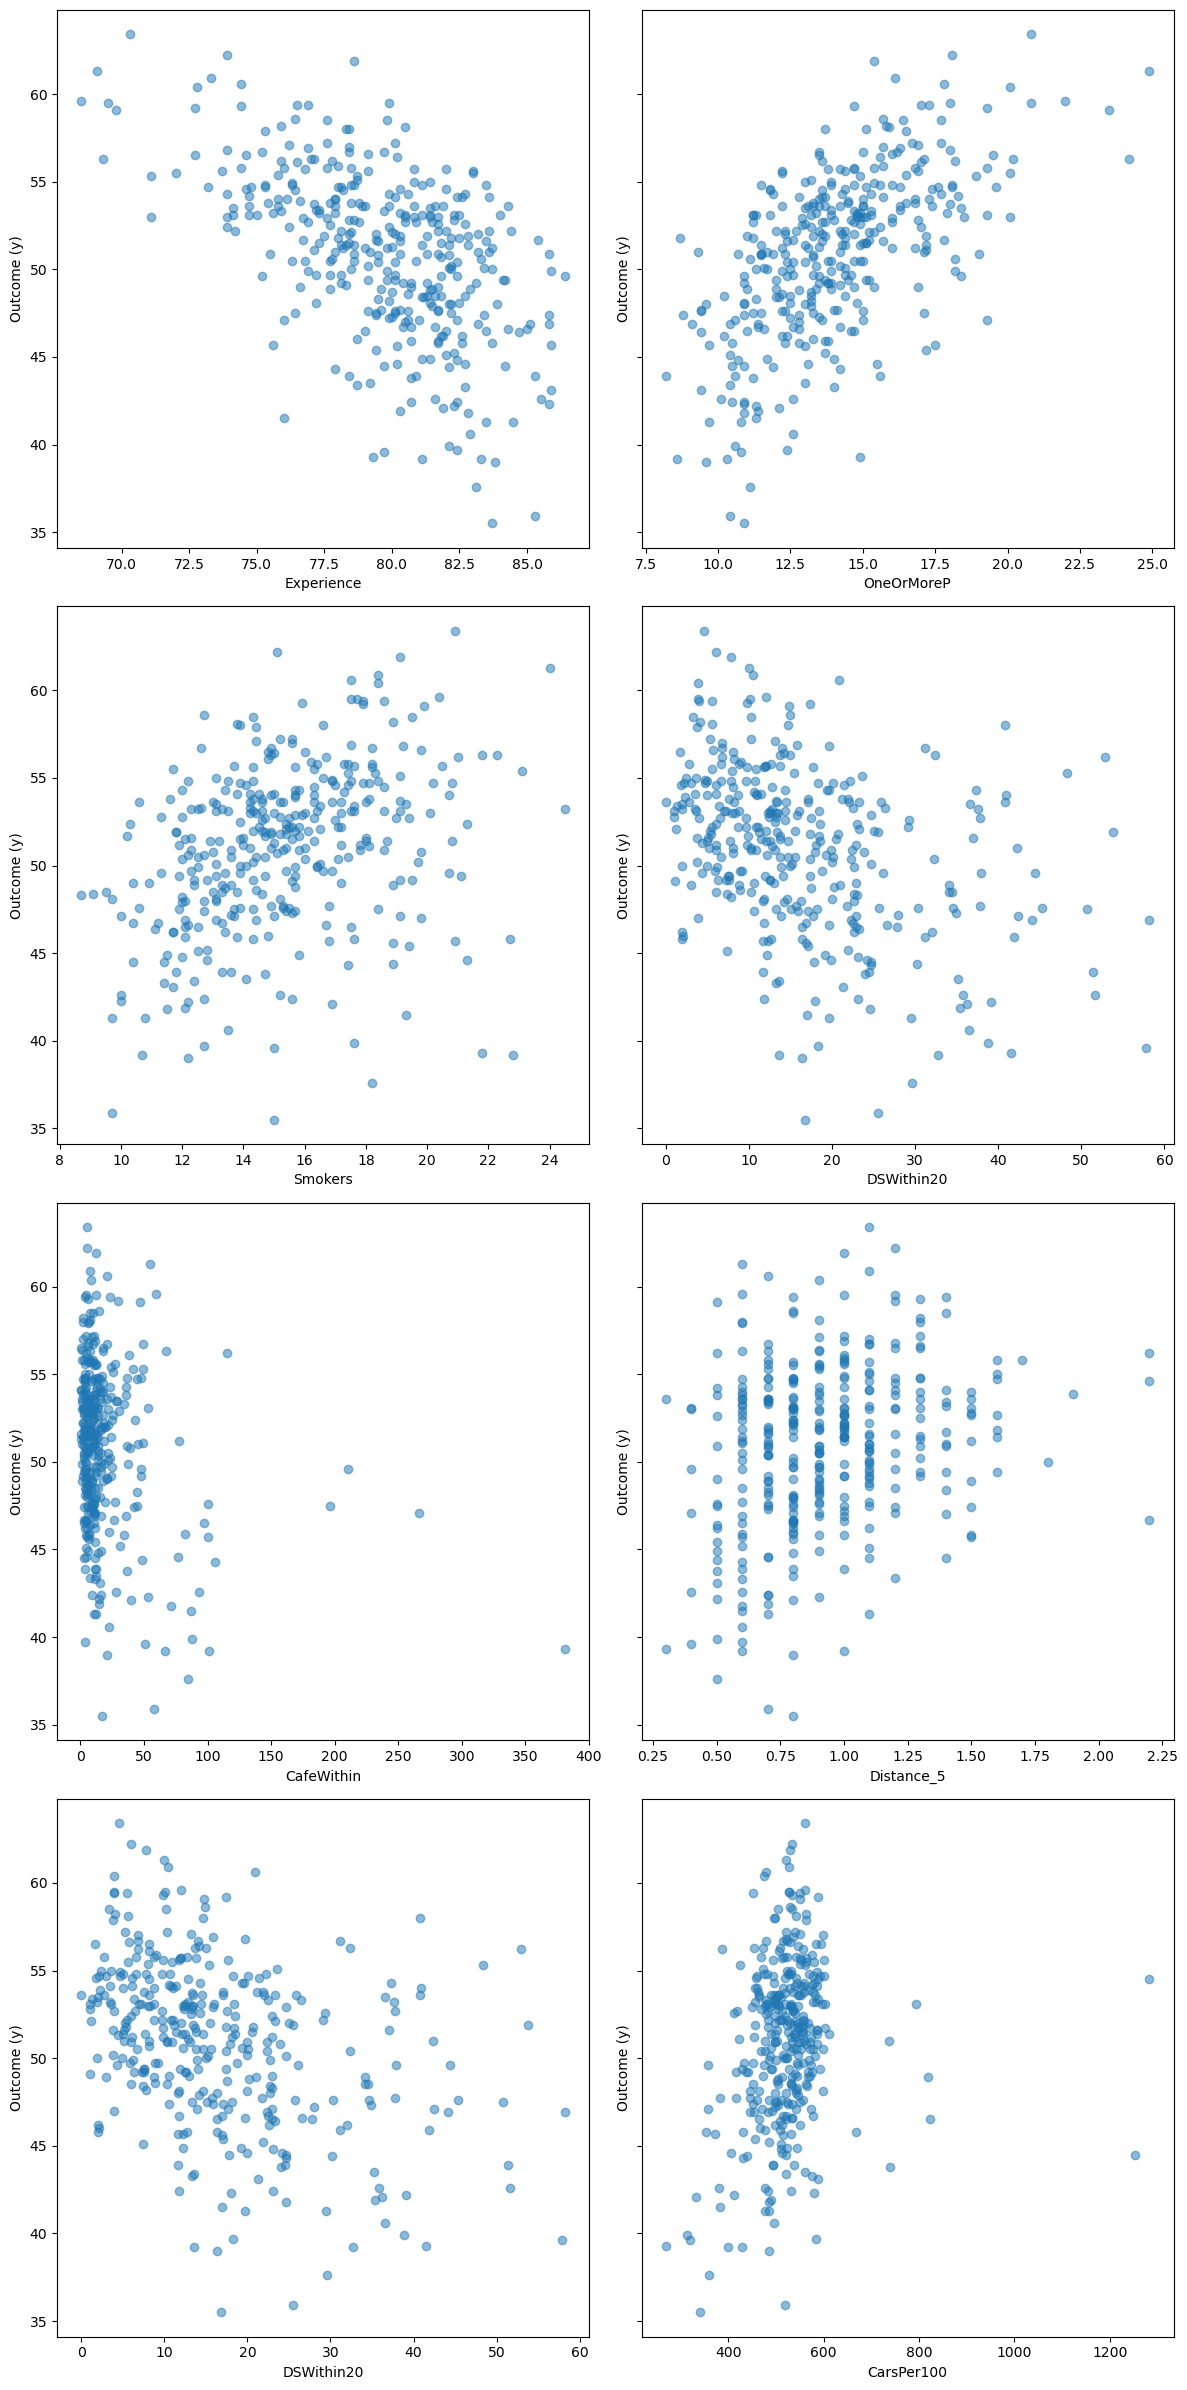

In [104]:
import matplotlib.pyplot as plt

def plot_scatter(predictors, y, gdf):
    n_predictors = len(predictors)
    n_cols = 2
    n_rows = int(n_predictors / n_cols) + (n_predictors % n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows), sharey=True)
    axes = axes.flatten()

    for i, predictor in enumerate(predictors):
        axes[i].scatter(gdf[predictor], y, alpha=0.5)
        axes[i].set_xlabel(predictor)
        axes[i].set_ylabel("Outcome (y)")

    # Remove extra subplots if any
    for i in range(n_predictors, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Call the function to create scatter plots
plot_scatter(modified_best_predictors, y, gdf)


In [101]:
import pandas as pd

# Convert y to a pandas Series, assuming y is a 1D numpy array or a list
y_series = pd.Series(y.ravel(), name="Outcome (y)")

# Create a DataFrame with the predictors and the outcome variable
data = pd.concat([gdf[best_predictors], y_series], axis=1)

# Compute correlation coefficients
correlations = data.corr()

# Display the correlation between each predictor and the outcome variable
print(correlations["Outcome (y)"])

Experience    -0.554949
OneOrMoreP     0.614850
Smokers        0.333960
CafeWithin    -0.254083
Distance_8     0.281720
CarsPer100     0.190029
Outcome (y)    1.000000
Name: Outcome (y), dtype: float64


In [ ]:
#Plotting local R2 values

#First add to gdf
gdf['localR2'] = gwr_results.localR2

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='localR2', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('Local R-squared values')
plt.show()

In [ ]:
#Percentage of smokers
gdf['params_smokers'] = gwr_results.params[:, 1]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='params_smokers', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('Local Smoker values')
plt.show()

In [ ]:
#Amount of snackbars
gdf['params_snackbar'] = gwr_results.params[:, 2]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='params_snackbar', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('Local Snackbar values')
plt.show()

In [ ]:
#Distance to supermarket
gdf['params_supermarket'] = gwr_results.params[:, 3]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='params_supermarket', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('Local Supermarket values')
plt.show()

In [ ]:
#Distance to train station
gdf['params_train'] = gwr_results.params[:, 4]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
gdf.plot(column='params_train', ax=ax, legend=True, cmap='viridis', edgecolor='black', linewidth=0.5)
ax.set_title('Local Trainstation values')
plt.show()

-- GWR and MGWR with Spatial CV --

In [78]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold, cross_val_predict

# Use the best predictor combination found earlier
best_predictors = ['Experience', 'OneOrMoreP', 'Smokers', 'DSWithin20', 'CafeWithin', 'Distance_5', 'Distance_8', 'CarsPer100']
X = gdf[best_predictors].values

# Standardize the predictor variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Spatial cross-validation
municipalities = gdf['Code'].values
group_kfold = GroupKFold(n_splits=5)
municipality_kfold = group_kfold.split(X_scaled, y, municipalities)
train_indices, test_indices = [list(traintest) for traintest in zip(*municipality_kfold)]
municipality_cv = [*zip(train_indices, test_indices)]

best_gwr_params = None
best_mgwr_params = None
best_gwr_r2 = -np.inf
best_mgwr_r2 = -np.inf


for train_index, test_index in municipality_cv:
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    coordinates_train, coordinates_test = coordinates[train_index], coordinates[test_index]

    # Select the bandwidth for GWR
    gwr_selector = Sel_BW(coordinates_train, y_train, X_train)
    gwr_bw = gwr_selector.search(interval=50, tol=1e-06, max_iter=500)

    # Fit the GWR model
    gwr_model = GWR(coordinates_train, y_train, X_train, gwr_bw)
    gwr_results = gwr_model.fit()
    
    if gwr_results.R2 > best_gwr_r2:
        best_gwr_r2 = gwr_results.R2
        best_gwr_params = gwr_results.params
        best_gwr_AIC = gwr_results.aic

    # Fit the MGWR model
    mgwr_selector = Sel_BW(coordinates_train, y_train, X_train, multi=True)
    mgwr_bw = mgwr_selector.search(multi_bw_min=[1], interval=50, tol=1e-06, max_iter=500)
    mgwr_model = MGWR(coordinates_train, y_train, X_train, selector=mgwr_selector)
    mgwr_results = mgwr_model.fit()
    
    if mgwr_results.R2 > best_mgwr_r2:
        best_mgwr_r2 = mgwr_results.R2
        best_mgwr_params = mgwr_results.params
        best_mgwr_AIC = mgwr_results.aic


print("Best GWR r2:", best_gwr_r2)
print("Best MGWR r2:", best_mgwr_r2)
print("Best GWR AIC:", best_gwr_AIC)
print("Best MGWR AIC:", best_mgwr_AIC)

Inference: 100%|██████████| 1/1 [00:01<00:00,  1.07s/it]

Best GWR r2: 0.7514016410089485
Best MGWR r2: 0.7756772186309455
Best GWR AIC: 1384.7932399998167
Best MGWR AIC: 1359.4368692186592


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cfc4dc78-fd2a-4b67-8dea-b0c970af57ec' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>